# Basic Image Processing using Python
In this notebook I would like to apply what I have learnt about image processing using library skimage. I will be doing:
1. Digitizing Contour
2. Facial Recognition

In [17]:
##Import Library
from skimage import data
from skimage import color
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import os

In [74]:
def show_image(image, ttl):
    plt.imshow(image)
    plt.title(ttl)
    plt.axis('off')
    plt.show()

def plot_comparison(ori,filtered,titleFilter):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(8,6))
    ax1.imshow(ori)
    ax1.set_title('original')
    ax1.axis('on')
    ax2.imshow(filtered)
    ax2.set_title(titleFilter)
    ax2.axis('on')
    
def show_detected_face(result,detected,title):
    plt.imshow(result)
    img_desc=plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('on')
    
    for patch in detected:
        img_desc.add_patch(patches.Rectangle((patch['c'],patch['r']),patch['width'],patch['height'],fill=False,color='r',linewidth=2))
    plt.show()

# Digitizing Contour

credit for the picture taken from : 
Geophysical Surveys Over Mounds at Wright-Patterson Air Force Base - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/A-topographic-contour-map-of-mound-1-at-the-Wright-Memorial-The-contour-interval-is-01_fig6_305587893 [accessed 24 May, 2020]

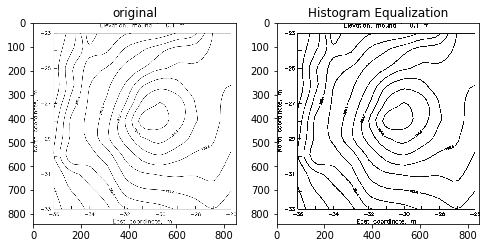

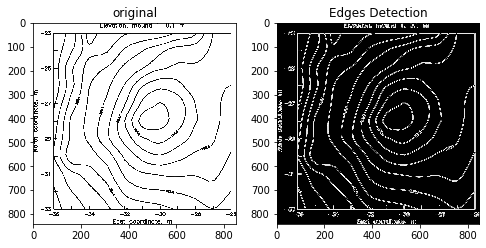

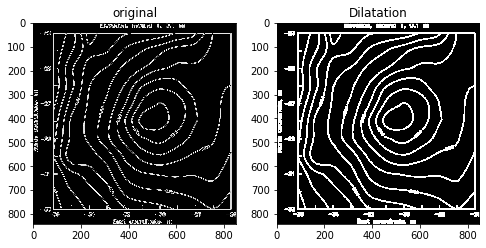

In [82]:
title='Topo'
file1=io.imread('topo.png')

#image enhancement
#contrast enhancement
from skimage import exposure
file11=exposure.equalize_hist(file1)
plot_comparison(file1,file11,'Histogram Equalization')

#detecting edges
from skimage.filters import sobel
file12=sobel(file11)
plot_comparison(file11,file12,'Edges Detection')

#morphology dilatation
from skimage import morphology
file13=morphology.binary_dilation(file12)
plot_comparison(file12,file13,'Dilatation')


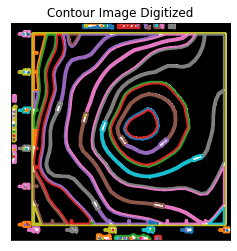

In [84]:
from skimage.filters import threshold_otsu
thresh=threshold_otsu(file13)
thresholded_img= file13>thresh

from skimage import measure
contours=measure.find_contours(thresholded_img,0.8)

#for contour in contours:
    #print(contour.shape)
    
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(file13, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.title('Contour Image Digitized')
plt.show()

# Facial Recognition

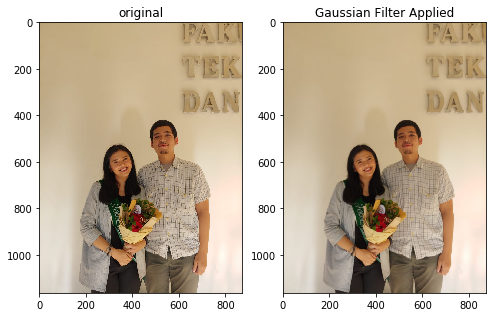

In [76]:
from skimage.transform import rescale
file2=io.imread('mkjk.jpg')
file2=rescale(file2,1,anti_aliasing=True, multichannel=True)


#image enhancement - gaussian smoothing
from skimage.filters import gaussian

file22=gaussian(file2,multichannel=True)
plot_comparison(file2,file22,'Gaussian Filter Applied')


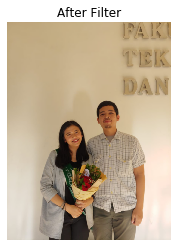

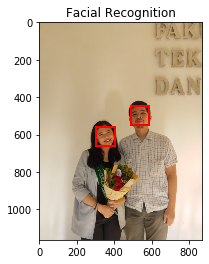

In [87]:
from skimage.feature import Cascade
from matplotlib import patches

trained_file=data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained_file)
detected = detector.detect_multi_scale(img=file22, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10,10), 
                                       max_size=(600,600))
show_image(file22,'After Filter')
show_detected_face(file22,detected,'Facial Recognition')